In [86]:
import os
import pandas as pd

# Get a list of all CSV files in the "data" directory
csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]

# Dictionary to hold dataframes
dfs = {}

# Load each CSV file into its own DataFrame
for csv_file in csv_files:
    # Use the file name (without .csv) as the key
    key = os.path.splitext(csv_file)[0]
    dfs[key] = pd.read_csv(os.path.join('data', csv_file))

# Now you can access each DataFrame with its file name
# For example, to print the head of the DataFrame for 'file1.csv', you can do:
dfs['gender_submission'].head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
dfs['train'].head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [88]:
# Drop unnecessary columns in place
dfs['train'].drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [89]:
dfs['train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


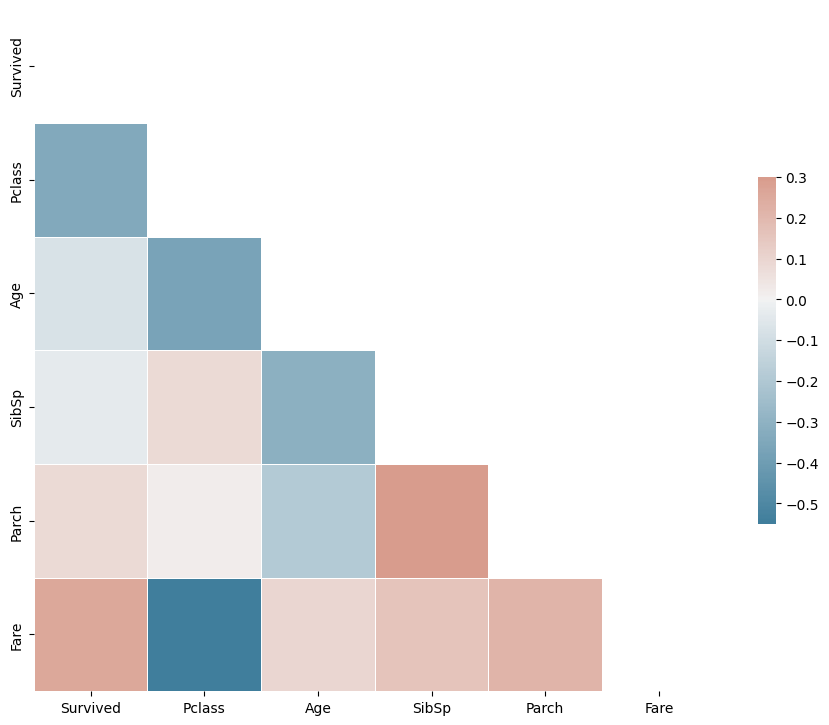

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = dfs['train'][['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

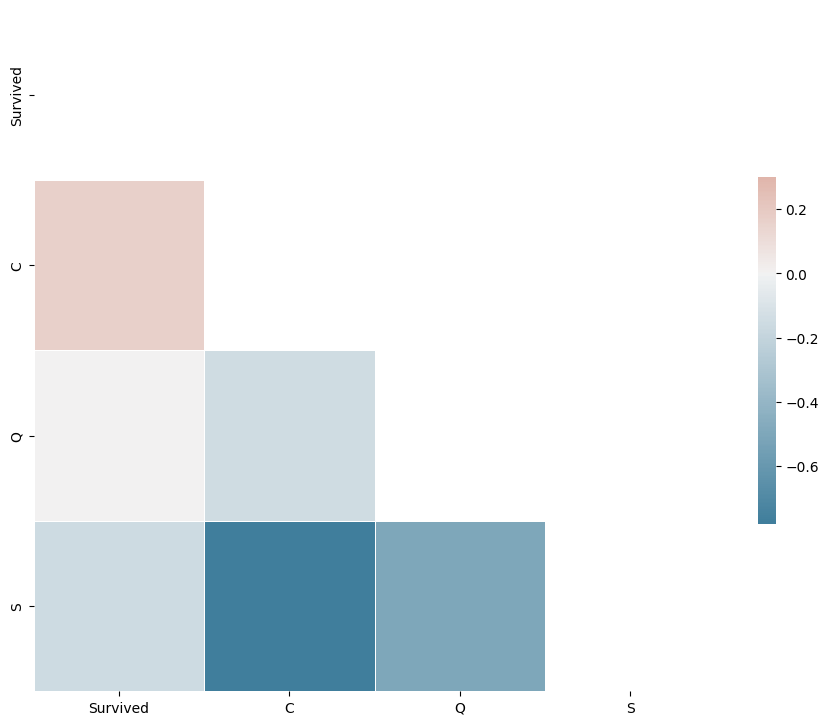

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Perform one-hot encoding on the 'Embarked' column
one_hot = pd.get_dummies(dfs['train']['Embarked'])

# Join the one-hot encoded columns to the DataFrame
df_encoded = dfs['train'].join(one_hot)

# Compute the correlation matrix with 'Survived' and the one-hot encoded columns
corr = df_encoded[['Survived', 'C', 'Q', 'S']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [97]:
dfs['train'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())]), ['Age', 'SibSp', 'Parch', 'Fare']),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder())]), ['Pclass', 'Sex', 'Embarked'])
    ])

# Apply transformations to df
X = dfs['train'].drop('Survived', axis=1)
y = dfs['train']['Survived']

X = preprocessor.fit_transform(X)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

# Define models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(),
    MLPClassifier()
]

# Apply transformations to df
X_train = dfs['train'].drop('Survived', axis=1)
y_train = dfs['train']['Survived']

# Transform test set
X_test = dfs['test']

for model in models:
    # Create a pipeline that first applies the preprocessor and then fits the model
    pipeline = make_pipeline(preprocessor, model)
    
    # Perform 5-fold cross-validation on the pipeline
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Compute the mean and standard deviation of the scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    
    print(f"Model: {model.__class__.__name__}, Mean accuracy: {mean_score}, Standard deviation: {std_score}")
    
    # Train the pipeline on the entire training set
    pipeline.fit(X_train, y_train)
    
    # Use the trained pipeline to make predictions on the test set
    y_pred = pipeline.predict(X_test)


Model: LogisticRegression, Mean accuracy: 0.7901387232439896, Standard deviation: 0.021624169504146768
Model: DecisionTreeClassifier, Mean accuracy: 0.7867679367271359, Standard deviation: 0.03169516285626076
Model: RandomForestClassifier, Mean accuracy: 0.799140041428661, Standard deviation: 0.02972059280919781
Model: GradientBoostingClassifier, Mean accuracy: 0.8271671583704727, Standard deviation: 0.02047234748398735
Model: SVC, Mean accuracy: 0.8271608813006089, Standard deviation: 0.01680793733461648
Model: KNeighborsClassifier, Mean accuracy: 0.8058627832527776, Standard deviation: 0.02503887369126071


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Model: MLPClassifier, Mean accuracy: 0.823821480133074, Standard deviation: 0.029873917523185953


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'linear', 'poly']
}

# Create a pipeline with SVC
pipeline = make_pipeline(preprocessor, SVC())

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

Best parameters: {'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
# Define the parameter grid
# Define the parameter grid
param_grid = {
    'gradientboostingclassifier__n_estimators': [200, 300, 400],
    'gradientboostingclassifier__learning_rate': [0.001, 0.01, 0.1],
    'gradientboostingclassifier__max_depth': [2, 3, 4],
    'gradientboostingclassifier__min_samples_split': [2, 5, 10]
}

# Create a pipeline with GradientBoostingClassifier
pipeline = make_pipeline(preprocessor, GradientBoostingClassifier())

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the index of the best score
best_index = grid_search.best_index_

# Print the mean and standard deviation of the cross-validation scores for the best estimator
print(f"Mean cross-validation score: {grid_search.cv_results_['mean_test_score'][best_index]}")
print(f"Standard deviation of cross-validation score: {grid_search.cv_results_['std_test_score'][best_index]}")

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)

# Use the best estimator to make predictions on the transformed test set
y_pred = grid_search.best_estimator_.predict(X_test_transformed)

Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__min_samples_split': 5, 'gradientboostingclassifier__n_estimators': 200}
Mean cross-validation score: 0.8384031134266523
Standard deviation of cross-validation score: 0.02036180648943473


ValueError: X has 12 features, but ColumnTransformer is expecting 7 features as input.

In [102]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the index of the best score
best_index = grid_search.best_index_

# Print the mean and standard deviation of the cross-validation scores for the best estimator
print(f"Mean cross-validation score: {grid_search.cv_results_['mean_test_score'][best_index]}")
print(f"Standard deviation of cross-validation score: {grid_search.cv_results_['std_test_score'][best_index]}")

# Use the best estimator to make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

Best parameters: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 100}
Mean cross-validation score: 0.8361559224154164
Standard deviation of cross-validation score: 0.022164249247972938


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Best parameters obtained from GridSearchCV for SVC and GradientBoostingClassifier
svc_best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
gbc_best_params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

# Create pipelines with the best parameters
svc_pipeline = make_pipeline(preprocessor, SVC(**svc_best_params))
gbc_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier())

# Fit the pipelines to the training data
svc_pipeline.fit(X_train, y_train)
gbc_pipeline.fit(X_train, y_train)

# Predict the 'Survived' column for the test set
svc_predictions = svc_pipeline.predict(dfs['test'])
gbc_predictions = gbc_pipeline.predict(dfs['test'])

# Create DataFrames for the predictions
svc_submission = pd.DataFrame({'PassengerId': dfs['test']['PassengerId'], 'Survived': svc_predictions})
gbc_submission = pd.DataFrame({'PassengerId': dfs['test']['PassengerId'], 'Survived': gbc_predictions})

# Write the DataFrames to CSV files
svc_submission.to_csv('svc_submission.csv', index=False)
gbc_submission.to_csv('gbc_submission.csv', index=False)

In [107]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GBC
gbc_param_grid = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [3, 4, 5],
    'gradientboostingclassifier__min_samples_split': [2, 5, 10],
    'gradientboostingclassifier__min_samples_leaf': [1, 2, 4],
    'gradientboostingclassifier__subsample': [0.6, 0.8, 1.0]
}

# Create a pipeline with GradientBoostingClassifier
gbc_pipeline = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))

# Create the GridSearchCV object for GBC
gbc_grid_search = GridSearchCV(gbc_pipeline, gbc_param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
gbc_grid_search.fit(X_train, y_train)

# Get the best parameters
gbc_best_params = gbc_grid_search.best_params_

# Print the best parameters
print(f"Best parameters for GBC: {gbc_best_params}")

# Use the best estimator to make predictions on the test set
gbc_predictions = gbc_grid_search.best_estimator_.predict(dfs['test'])

# Create a DataFrame for the predictions
gbc_submission = pd.DataFrame({'PassengerId': dfs['test']['PassengerId'], 'Survived': gbc_predictions})

# Write the DataFrame to a CSV file
gbc_submission.to_csv('gbc_submission.csv', index=False)

Best parameters for GBC: {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 4, 'gradientboostingclassifier__min_samples_leaf': 1, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 50, 'gradientboostingclassifier__subsample': 1.0}
